In [1]:
import pandas as pd

Recursos disponibles en el IMSS para Nuevo Leon

In [4]:
recursos_salud = pd.read_csv('Recursos_Salud_2018.csv', encoding="latin-1")

In [12]:
recursos_salud.groupby('Nombre Estado')['TOTAL CAMAS AREA HOSPITALIZACIÓN'].sum()

Nombre Estado
AGUASCALIENTES                       966
BAJA CALIFORNIA                     2153
BAJA CALIFORNIA SUR                  695
CAMPECHE                             790
CHIAPAS                             2260
CHIHUAHUA                           2915
CIUDAD DE MEXICO                   15632
COAHUILA DE ZARAGOZA                2915
COLIMA                               649
DURANGO                             1542
GUANAJUATO                          3657
GUERRERO                            2075
HIDALGO                             1367
JALISCO                             6460
MEXICO                              8356
MICHOACAN DE OCAMPO                 2648
MORELOS                             1047
NAYARIT                              714
NUEVO LEON                          4077
OAXACA                              2352
PUEBLA                              4012
QUERETARO                            881
QUINTANA ROO                        1030
SAN LUIS POTOSI                     2021
SI

Camas por empleado

In [98]:
recursos_salud = recursos_salud[recursos_salud['Nombre Estado'] == 'NUEVO LEON']

In [99]:
recursos_salud['empleados']  =recursos_salud['Total médicos generales y especialistas'] + \
        recursos_salud['Total personal técnico'] + \
        recursos_salud['Total personal profesional'] \
        + recursos_salud['Total otro personal'] 

/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [100]:
recursos_salud['camas'] = recursos_salud['TOTAL CAMAS AREA HOSPITALIZACIÓN'] 

/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


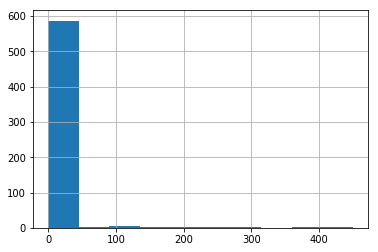

In [122]:
recursos_salud['camas'].hist()

In [101]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [102]:
lm1 = smf.ols(formula='camas ~ empleados', data=recursos_salud).fit()

Regresion de recursos disponibles aproximados

In [103]:
feature_cols = ['empleados']
X = recursos_salud[feature_cols]
y = recursos_salud.camas
# Initiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
print ("iNTERCEPT : ",lm2.intercept_)
print ("CO-EFFICIENT : ",lm2.coef_)

iNTERCEPT :  -2.5701335753244345
CO-EFFICIENT :  [0.25543953]


In [105]:
lm2.score(X,y)

0.826589780635767

/Users/ricalanis/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


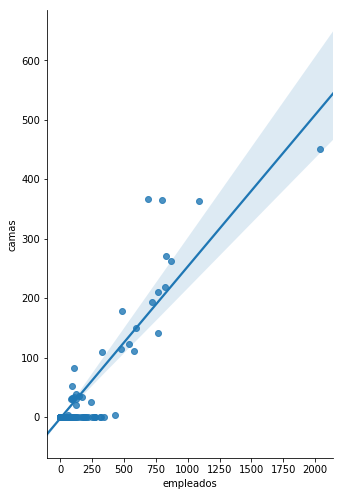

In [106]:
sns.pairplot(recursos_salud, x_vars=['empleados'], y_vars='camas', size=7, aspect=0.7, kind='reg')

In [107]:
import requests

In [108]:
url = 'https://www.inegi.org.mx/app/mapa/componente/Espacial.ashx'

In [109]:
params = {
    'metodo':'ArmabusquedaEstablecimientos',
    'Ac_eco[0][sec]':'',
    'Ac_eco[1][subsec]':'622,623',
    'Ac_eco[2][rama]':'',
    'Ac_eco[3][subra]':'',
    'Ac_eco[4][clase]':'',
    'Tamaño':'',
    'Cve_geo[0][ent]':19,
    'Cve_geo[1][mun]':'',
    'Cve_geo[2][loc]':'',
    'Txt_gral':'',
    'Txt_nom':'',
    'Txt_calle':'',
    'Txt_colonia':'',
    'Txt_cp':'',
    'Txt_vc':'',
    'Txt_prod':'',
    'Txt_paisexp':'',
    'Txt_paisimp':'',
    'Txt_camara':'',
    'Txt_mts':'',
    'Txt_radio':'',
    'Txt_coord':'',
    'idee':'',
    'Pagini':1,
    'Pagfin':5000
}

(622) Hospitales
(623) Residencias de asistencia social 
En NL


In [110]:
data = requests.post(url,params).json()

In [111]:
hospitales_denue = data['obj']

In [119]:
def get_employees(denue_id):
    return requests.get(f'https://www.inegi.org.mx/app/mapa/componente/APIGeografico/infowindowDenue/{denue_id}/DENUE/62').json()[0]['d14']

In [120]:
employees_per_hospital = [get_employees(hospital[0]) for hospital in hospitales_denue]

In [114]:
employees_overwite_mas = [x.replace('más', '250') for x in employees_per_hospital]

In [115]:
import numpy as np

In [116]:
np.sum(lm2.predict([[int(hospital.split()[0])] for hospital in employees_per_hospital]))

2507.365260459115

In [117]:
np.sum(lm2.predict([[int(hospital.split()[2])] for hospital in employees_overwite_mas]))

4672.981617190715